# Урок 1. Введение в спортивный анализ данных, Exploration Data Analysis.

## Домашнее задание 1:

**Задание 1:** Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

**Задание 2:** Сделать базовый анализ целевой переменной, сделать выводы;

**Задание 3:** Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var\_0, var\_1, var\_2, var\_5, var\_9, var\_10, var\_13, var\_20, var\_26, var\_40, var\_55, var\_80, var\_106, var\_109, var\_139, var\_175, var\_184, var\_196), сделать выводы;

**Задание 4:** Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

**Задание 5:** Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

**Задание 6:** Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

**Задание 7 (опция):** Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

p.s. это обязательная программа для выполнения домашки, вы можете расширить эту программу и сделать больше; я только за 😃

In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install missingno
# !pip install sklearn
# !pip install xgboost==1.2.1

In [2]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('assignment1_data/train.csv')
test_df = pd.read_csv('assignment1_data/test.csv')

In [4]:
print("train.shape = {} rows, {} cols".format(*train_df.shape))
print("test.shape = {} rows, {} cols".format(*test_df.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


## Задание 1:
Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [5]:
train_df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [6]:
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [7]:
test_df.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [8]:
# Определим пропуски в данных для каждого из столбцов.
train_df.isna().sum()[train_df.isna().sum() != 0]

Series([], dtype: int64)

In [9]:
test_df.isna().sum()[test_df.isna().sum() != 0]

Series([], dtype: int64)

In [10]:
# Пропущеных значений не наблюдается.

# Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

In [11]:
train_df['target'].value_counts() # Выборка достаточно сино не сбаласирована.

0    179902
1     20098
Name: target, dtype: int64

In [12]:
# Целевая переменная принимает тольео два возможных значения. Причем выборка не сбалансирована. 
# возможно потом возникнетнеобходимость в балансировке данных.

In [13]:
# Получим список признаков. 
numerical = [col for col, value in train_df.iteritems()]
len(numerical)

202

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [15]:
numerical_features = train_df.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

# numerical_features.columns

count of numeric_features 201


**Задание 3:** Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

In [16]:
features = train_df.columns[2:]
len(features)

200

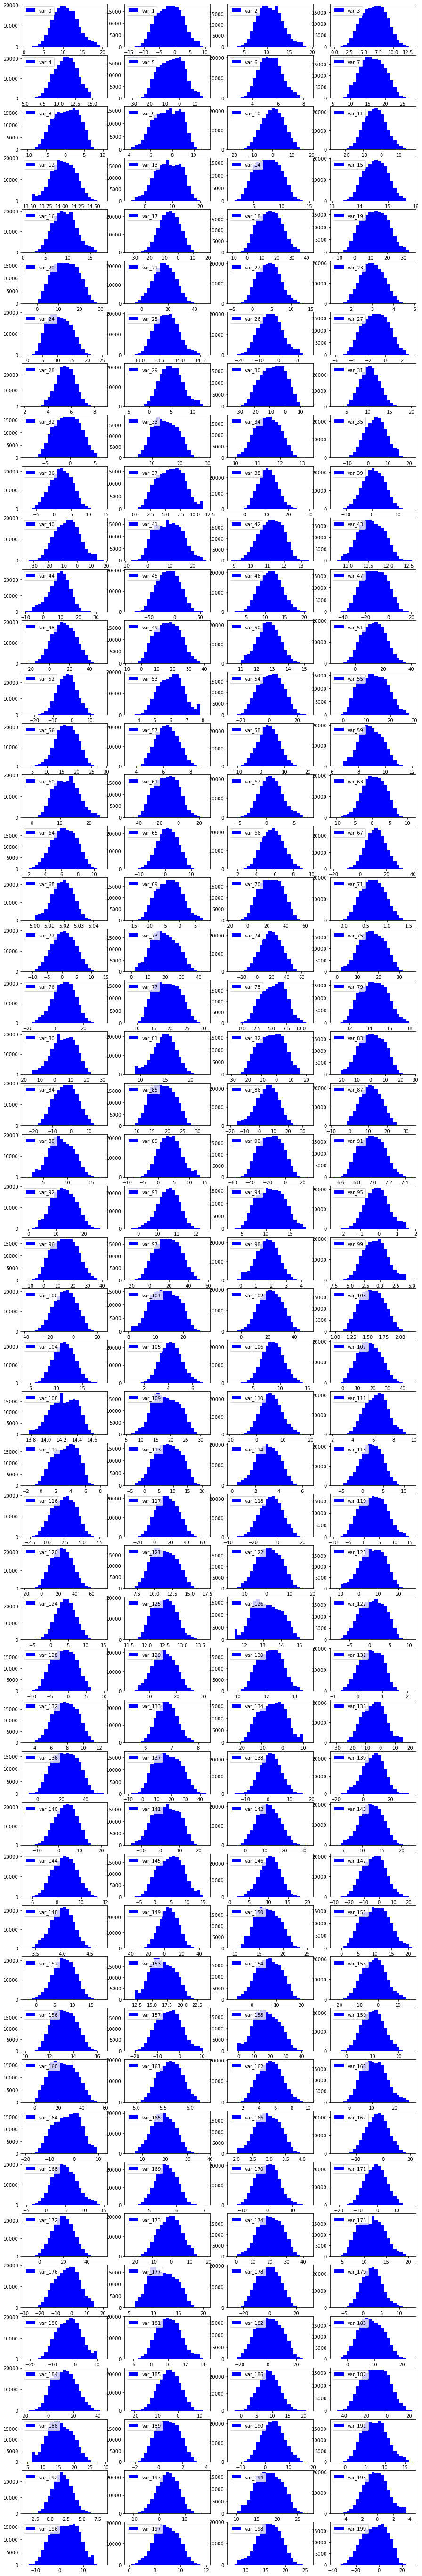

In [17]:
fig, axes = plt.subplots(50, 4, figsize=(15, 100))

for num, feature in enumerate(features):
    data = train_df[feature].copy()
    axes[num//4, num%4].hist(data, bins=25, color="blue", label=feature)
    axes[num//4, num%4].legend(loc='upper left')
    # axes[num//4, num%4].set_xlabel(feature, fontsize=14)

Для непрерывные признаков имеет смысл строить гистрограммы распределения или функции распределения, а также зависимость непрерывного признака в разрезе целевой переменной. Кроме того, имеет смысл строить распределение __одновременно__ и для обучающей выборки, и для тестовой для понимания насколько отличаются распределения.

In [18]:
features_crop = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 
'var_20', 'var_26', 'var_40', 'var_55', 'var_80', 'var_106', 'var_109', 'var_139', 
'var_175', 'var_184', 'var_196']
len(features_crop)

18

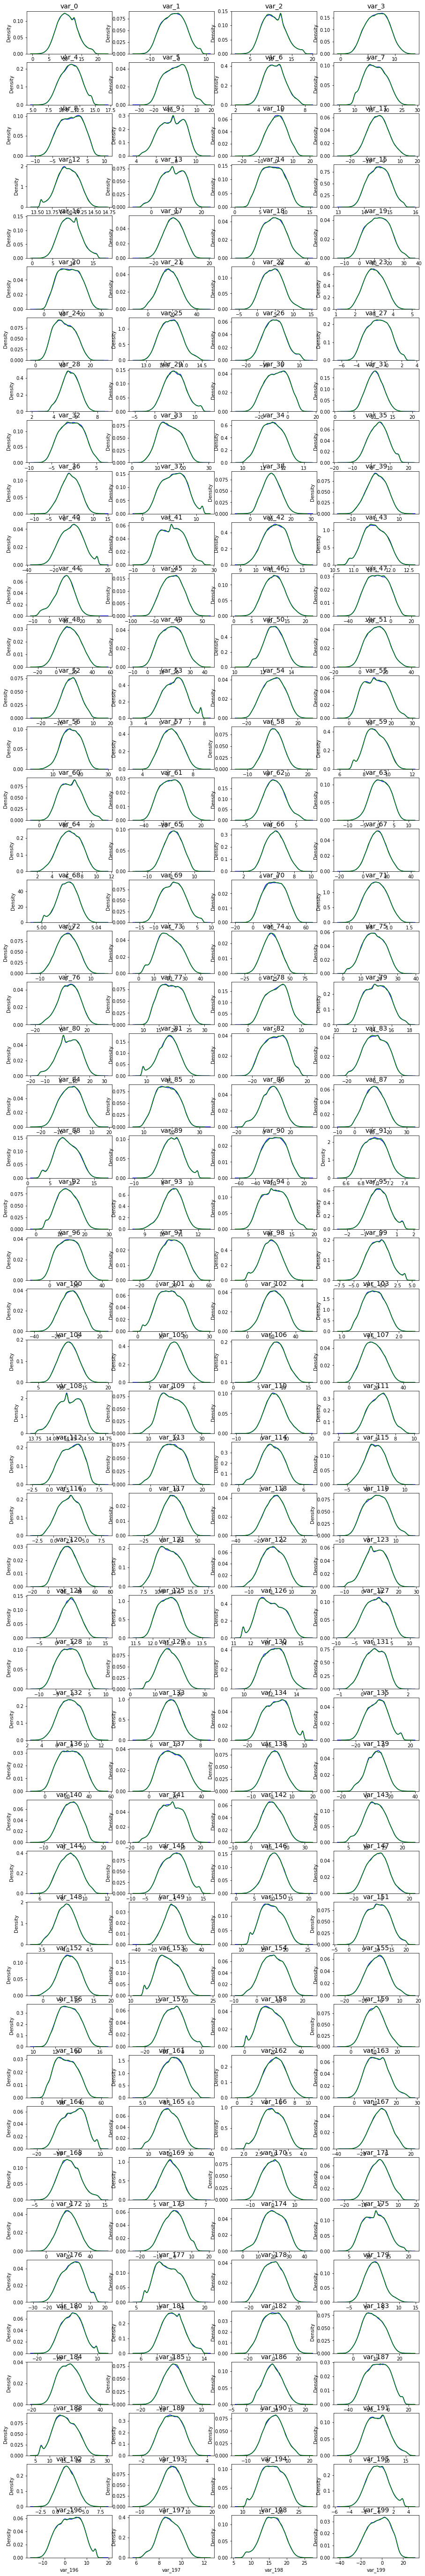

In [19]:
fig, axes = plt.subplots(50, 4, figsize=(15, 100))

for num, feature in enumerate(features):
    try:
        train_data, test_data = train_df[feature].copy(), test_df[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train_df[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
    axes[num//4, num%4].set_title(feature, fontsize=14)

In [20]:
# fig, axes = plt.subplots(5, 4, figsize=(15, 15))

# for num, feature in enumerate(features_crop):
#     data = train_df[feature].copy()
#     axes[num//4, num%4].hist(data, bins=25, color="blue")
#     axes[num//4, num%4].set_xlabel(feature, fontsize=14)

тестовая и тренировочная выборки имеют одинаковое рапределение. Для всех фитчей.

In [21]:
# fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# for num, feature in enumerate(continuous_feature):
#     try:
#         train_data, test_data = train[feature].copy(), test[feature].copy()
#         sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
#         sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
#     except RuntimeError:
#         pass
#     except KeyError:
#         train_data = train[feature].copy()
#         sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
#     axes[num//4, num%4].set_title(feature, fontsize=14)

In [22]:
# построим просто распределение переменных на датасете.

**Задание 4:** Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

In [23]:
# target = train["SalePrice"]
# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# axes[0].set_title("Johnson SU", fontsize=14)
# sns.distplot(target, kde=False, color="blue", fit=st.johnsonsu, ax=axes[0])

# axes[1].set_title("Normal", fontsize=14)
# sns.distplot(target, kde=False, color="blue", fit=st.norm, ax=axes[1])

# axes[2].set_title("Log Normal", fontsize=14)
# sns.distplot(target, kde=False, color="blue", fit=st.lognorm, ax=axes[2])

**Задание 5:** Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [24]:
correlation = train_df[features_crop+['target']].corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target     1.000000
var_26     0.062422
var_2      0.055870
var_0      0.052390
var_1      0.050343
var_40     0.049530
var_184    0.048315
var_106    0.032947
var_5      0.030979
var_196    0.023608
var_175    0.021692
var_55     0.017176
var_10    -0.002213
var_20    -0.018329
var_9     -0.042805
var_109   -0.049926
var_13    -0.055156
var_80    -0.057609
var_139   -0.074080
Name: target, dtype: float64

In [25]:
correlation = train_df[1:].corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target[:20]

target     1.000000
var_6      0.066730
var_110    0.064274
var_53     0.063397
var_26     0.062422
var_22     0.060557
var_99     0.058365
var_190    0.055974
var_2      0.055871
var_133    0.054547
var_0      0.052389
var_1      0.050341
var_179    0.050001
var_40     0.049531
var_184    0.048318
var_78     0.048246
var_170    0.047971
var_191    0.047112
var_94     0.046298
var_67     0.044676
Name: target, dtype: float64

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

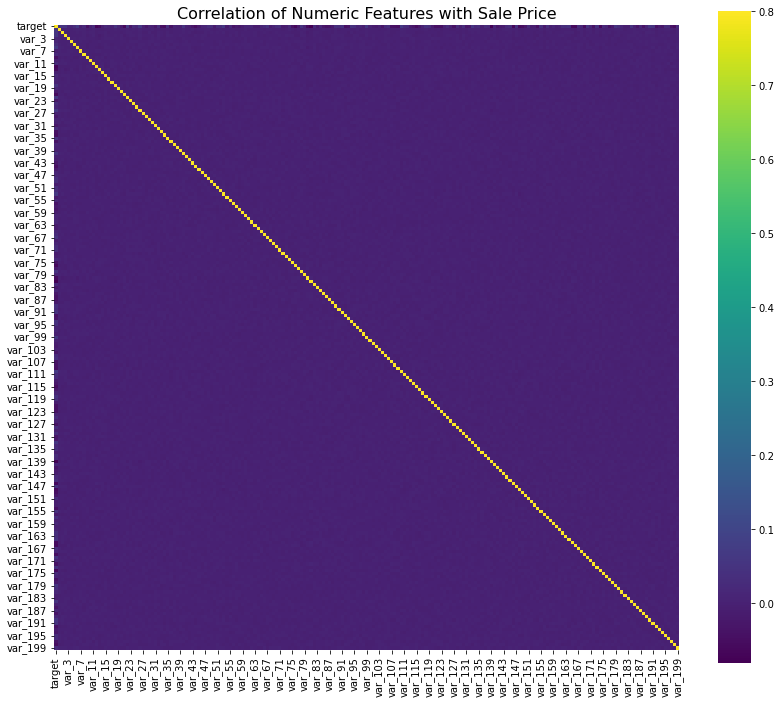

In [26]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

**Задание 6:** Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

## Нелинейная связь между признаками

Коэффициент корреляции позволяет установить линейную силу связи между признаками, но также признаки могут быть связаны нелинейно, что сложно определяется коэффициентом корреляции: может быть ситуация, что признаки очень сильно связаны между собой, но коэффициент корреляции равен 0. 

Для начала давайте воспользуемся случайным лесом, чтобы выбрать 10 наиболее значимых признаков. Они могут служить отправной точкой для понимания природы данных и общего понимания данные. Кроме того, они могут дать некоторые идеи о том, как создавать новые признаки. Давайте начнем!

In [27]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 5}

forest = RandomForestClassifier(**parameters)
forest.fit(train_df[features], train_df['target'])

CPU times: user 47.4 s, sys: 132 ms, total: 47.5 s
Wall time: 10.1 s


RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=5, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

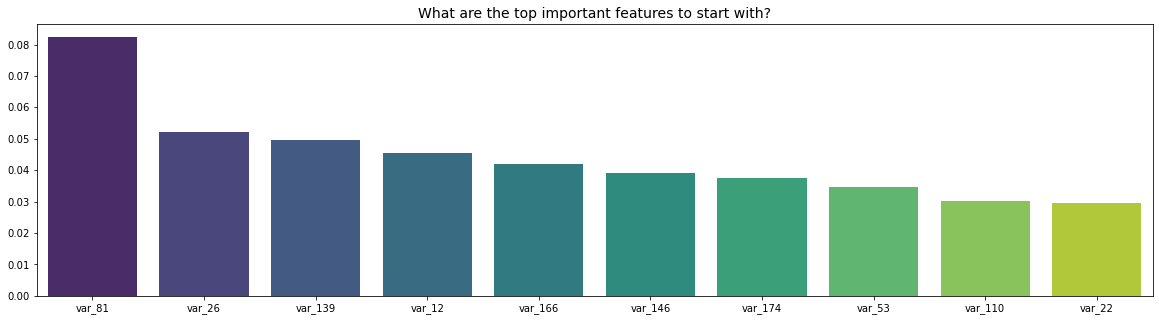

In [28]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
# feature_names = numerical_features.drop("SalePrice", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=features[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [29]:
importances.shape

(200,)

In [30]:
idx

array([ 81,  26, 139,  12, 166, 146, 174,  53, 110,  22])

In [31]:
['var_81','var_12','var_139','var_26','var_166','var_53','var_110','var_174','var_109','var_22','var_146']

['var_81',
 'var_12',
 'var_139',
 'var_26',
 'var_166',
 'var_53',
 'var_110',
 'var_174',
 'var_109',
 'var_22',
 'var_146']

In [32]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 8}

forest = RandomForestRegressor(**parameters)
forest.fit(train_df[features], train_df['target'])

CPU times: user 21min 21s, sys: 3.73 s, total: 21min 25s
Wall time: 3min 41s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=8, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

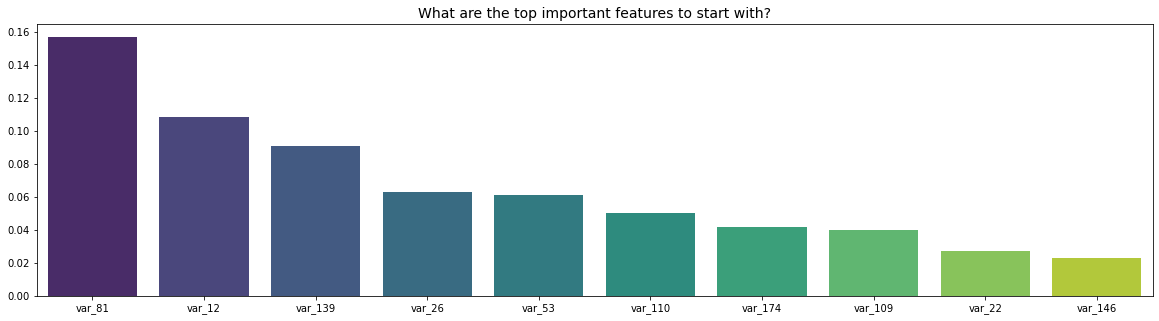

In [33]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
# feature_names = numerical_features.drop("SalePrice", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=features[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [34]:
top_11_collumns=['target','var_81','var_12','var_139','var_26','var_166','var_53','var_110','var_174','var_109','var_22','var_146']

In [35]:
train_df = shuffle(train_df)

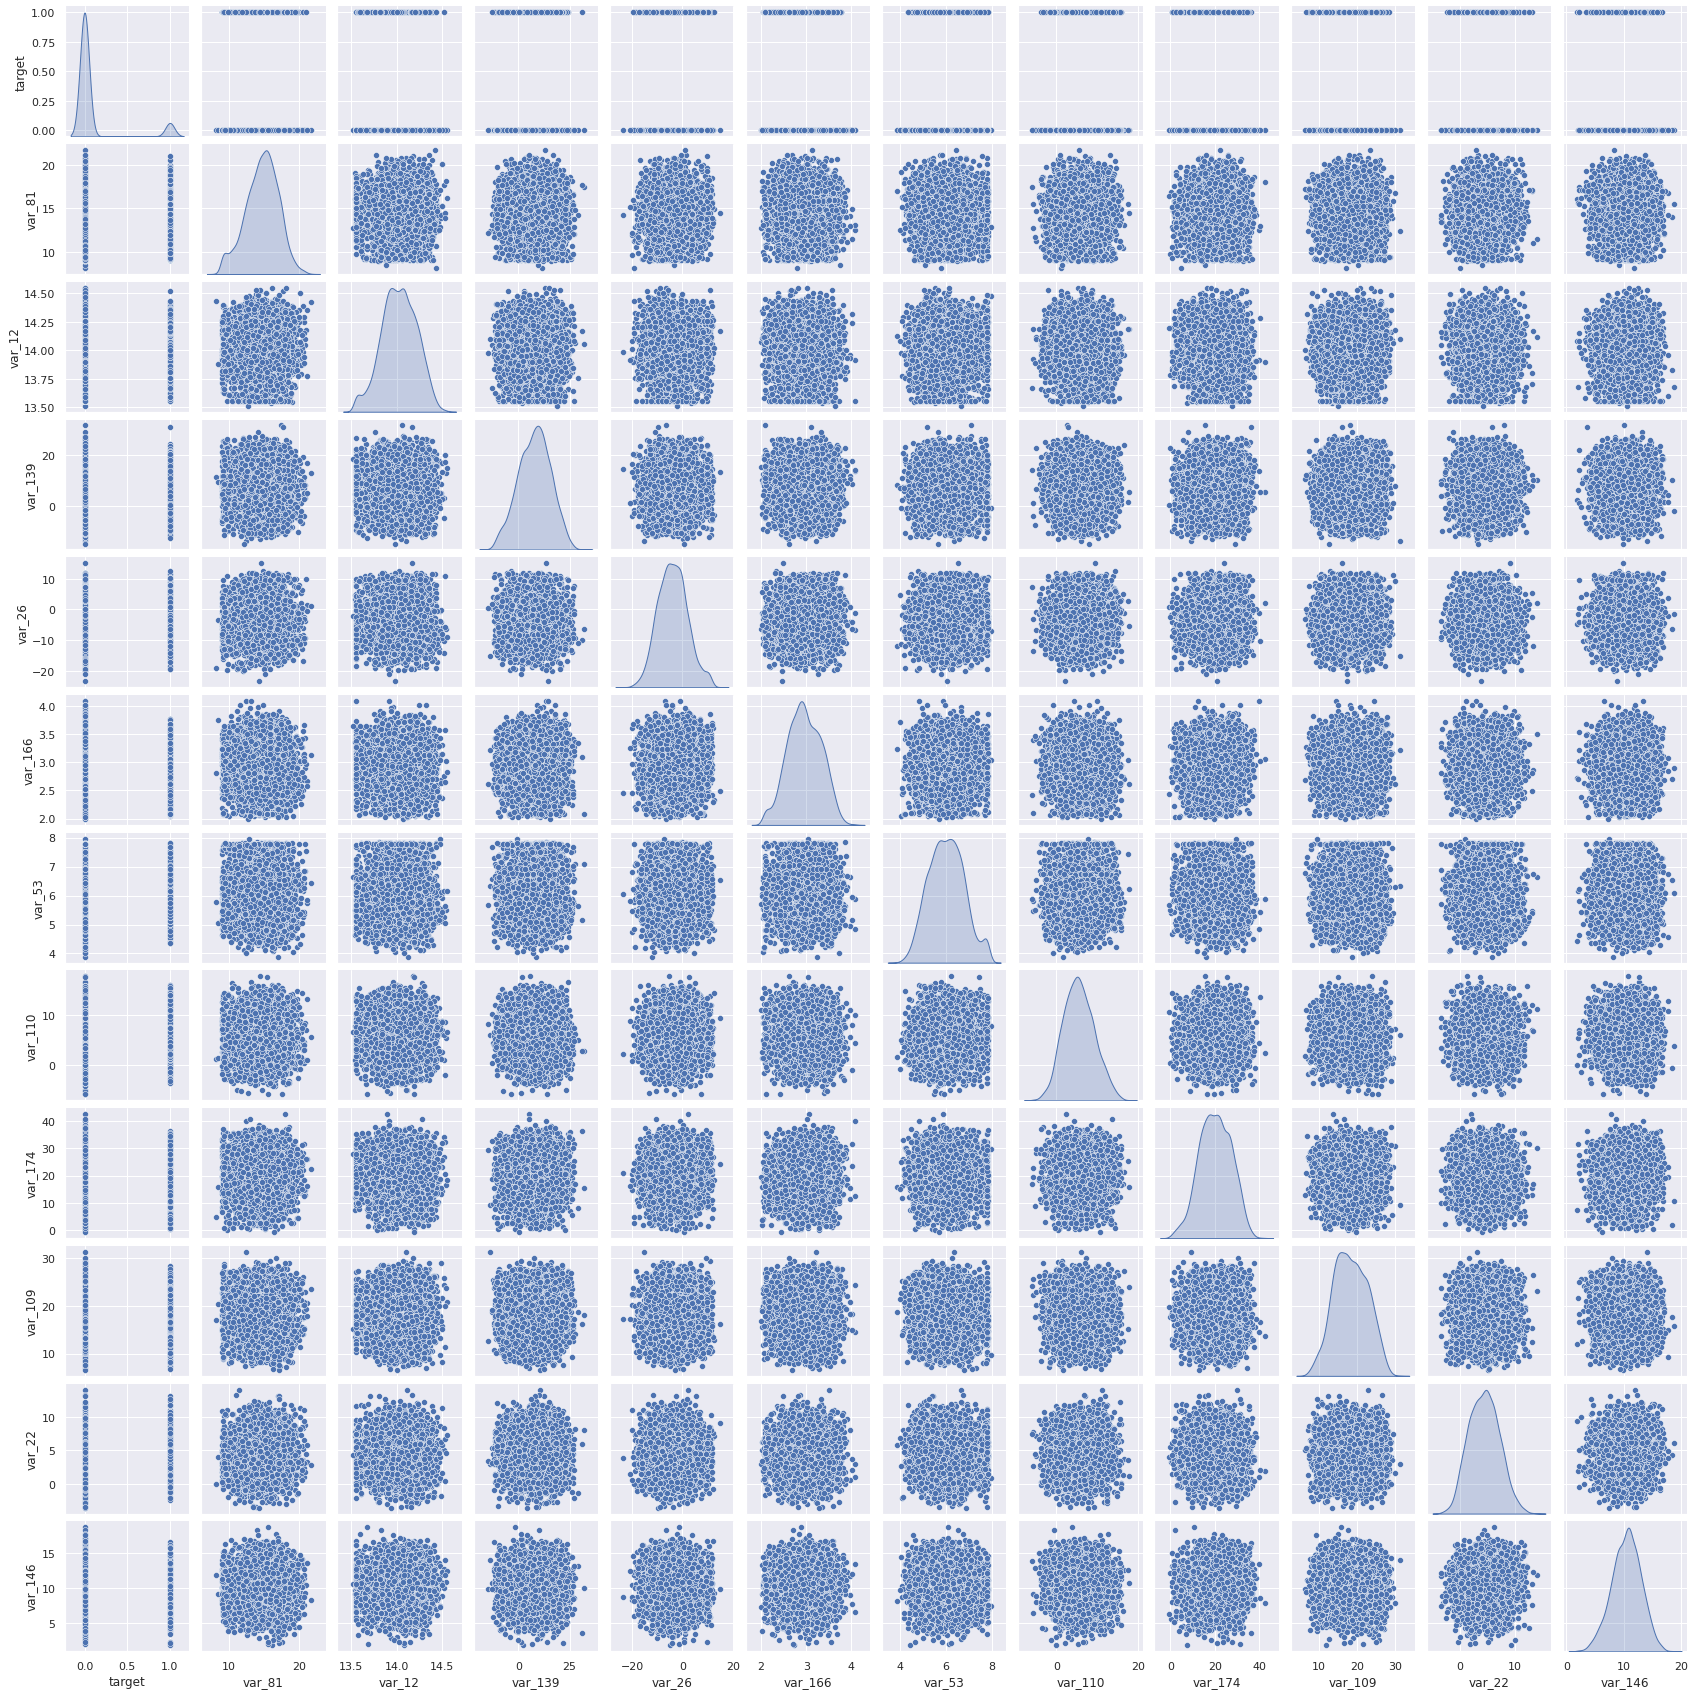

In [36]:
sns.set()
sns.pairplot(train_df[top_11_collumns][:5000], height=2, kind="scatter", diag_kind="kde")
plt.show()

**Задание 7 (опция):** Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

## Анализ распределения на обучении и тесте

Совпадение распределений на выборке для обучения и для тестирования - одна из ключевых коцепций статистического обучения. Обучая модель на некоторых данных, мы принимаем гипотезу о том, что модель должна работать на таких же данных.

## Kolmogorov-Smirnov Test

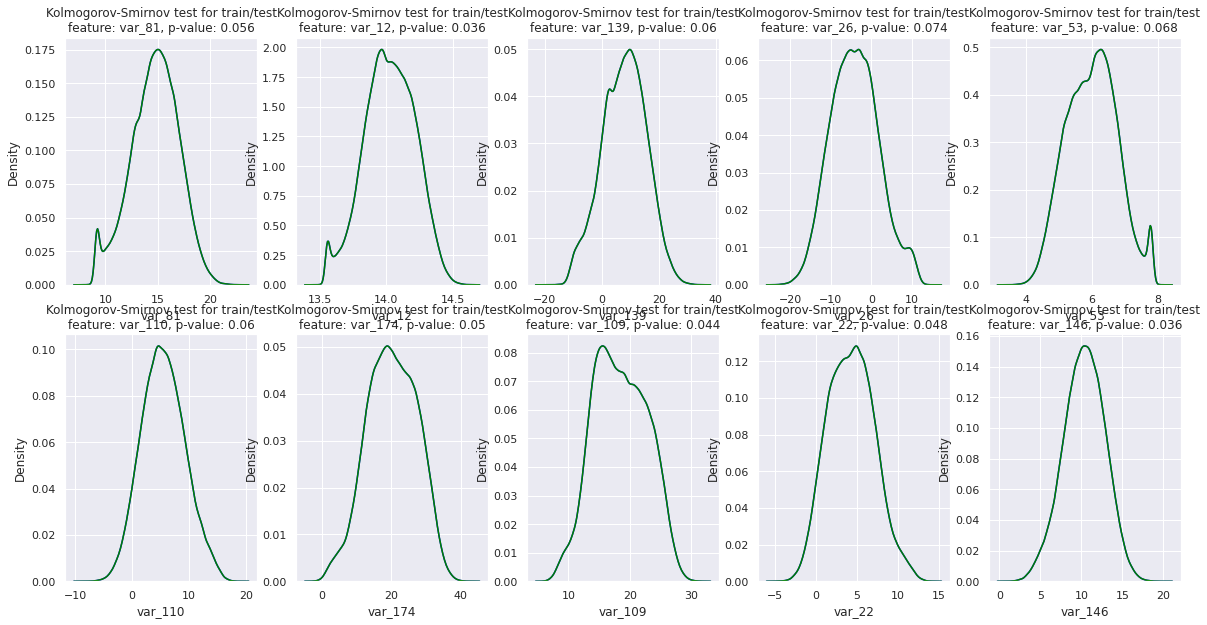

In [37]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(features[idx]):
    statistic, pvalue = ks_2samp(
        train_df[feature].sample(500), test_df[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train_df[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(train_df[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

## Population Stability Index

In [38]:
class PSI(BaseEstimator, TransformerMixin):
    """
    Вычисление PSI и отбор признаков на их основе.

    Parameters
    ----------
    threshold: float
        Порог для отбора переменных по PSI.
        Если PSI для переменной выше порога - переменная макрируется
        0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

    categorical_features: List[str], optional, default = None
        Список категориальных признаков для анализа.
        Опциональный параметр, по умолчанию, не используется, т.е.
        категориальные признаки отсутствуют.

    n_bins: int, optional, default = 20
        Количество бинов, на которые разбивается выборка.

    min_value: float, optional, default = 0.005
        Значение которое используется, если рассчитанный psi = 0.

    bin_type: string, optional, default = "quanitles"
        Способ разбиения на бины: "quantiles" or "bins".
        При выборе "quantiles" - выборка будет разбита на n_bins
        квантилей, при выборке "bins" - выборка будет разбита на
        n_bins бакетов с равным шагом между бакетами.
        Иные значения приводят к возникновению ValueError.

    Attributes
    ----------
    scores_: Dict[str, float]
        Словарь со значениями PSI,
        ключ словаря - название признака, значение - PSI-score.

    """
    def __init__(self,
                 threshold: float,
                 categorical_features: Optional[List[str]] = None,
                 bin_type: str = "quantiles",
                 min_value: float = 0.005,
                 n_bins: int = 20):

        self.threshold = threshold
        self.categorical_features = categorical_features
        self.min_value = min_value
        self.n_bins = n_bins
        if bin_type in ["quantiles", "bins"]:
            self.bin_type = bin_type
        else:
            raise ValueError(
                "Incorrect bin_type value. Expected 'quantiles' or 'bins', "
                f"but {bin_type} is transferred."
            )
        self.scores = {}

    def calculate_bins(self, data: pd.Series) -> np.array:
        """
        Вычисление границ бинов для разбиения выборки.

        Parameters
        ----------
        data: pandas.Series, shape = [n_samples, ]
            наблюдения из train-выборки.

        Returns
        -------
        bins: numpy.array, shape = [self.n_bins + 1]
            Список с границами бинов.

        """
        if self.bin_type == "quantiles":
            bins = np.linspace(0, 100, self.n_bins + 1)
            bins = [np.nanpercentile(data, x) for x in bins]

        else:
            bins = np.linspace(data.min(), data.max(), self.n_bins + 1)

        return np.unique(bins)

    def calculate_psi_in_bin(self, expected_score, actual_score) -> float:
        """
        Вычисление значения psi для одного бакета.

        Осуществляется проверка на равенство нулю expected_score и
        actual_score: если один из аргументов равен нулю, то его
        значение заменяется на self.min_value.

        Parameters
        ----------
        expected_score: float
            Ожидаемое значение.

        actual_score: float
            Наблюдаемое значение.

        Returns
        -------
        value: float
            Значение psi в бине.

        """
        if expected_score == 0:
            expected_score = self.min_value
        if actual_score == 0:
            actual_score = self.min_value

        value = (expected_score - actual_score)
        value = value * np.log(expected_score / actual_score)

        return value

    def calculate_psi(self, expected: pd.Series, actual: pd.Series, bins) -> float:
        """
        Расчет PSI для одной переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        bins: pandas.Series, shape = [self.n_bins, ]
            Бины для расчета PSI.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        expected_score = np.histogram(expected.fillna(-9999), bins)[0]
        expected_score = expected_score / expected.shape[0]

        actual_score = np.histogram(actual.fillna(-9999), bins)[0]
        actual_score = actual_score / actual.shape[0]

        psi_score = np.sum(
            self.calculate_psi_in_bin(exp_score, act_score)
            for exp_score, act_score in zip(expected_score, actual_score)
        )

        return psi_score

    def calculate_numeric_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для числовой переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = self.calculate_bins(expected)
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def calculate_categorical_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для категориальной переменной.
        PSI рассчитывается для каждого уникального значения категории.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = np.unique(expected).tolist()
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def fit(self, X, y=None):
        """
        Вычисление PSI-значения для всех признаков.

        Parameters
        ----------
        X: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        y: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        self
        """
        missed_columns = list(set(X.columns) - set(y.columns))

        if missed_columns:
            raise MissedColumnError(
                f"Missed {list(missed_columns)} columns in data.")

        if self.categorical_features:
            numeric_features = list(
                set(X.columns) - set(self.categorical_features)
            )
            for feature in self.categorical_features:
                self.scores[feature] = self.calculate_categorical_psi(
                    X[feature], y[feature]
                )
        else:
            numeric_features = X.columns

        for feature in tqdm(numeric_features):
            self.scores[feature] = self.calculate_numeric_psi(
                X[feature], y[feature]
            )
        return self

    def transform(self, X, y=None) -> pd.DataFrame:
        """
        Отбор переменных по self.threshold.
        Если PSI-score для переменной выше порога, то переменная
        помечается 0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

        Parameters
        ----------
        data: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        target: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        scores: pandas.DataFrame, shape = [n_features, 3]
            Датафрейм с PSI-анализом переменных.

        """
        check_is_fitted(self, "scores")
        scores = pd.Series(self.scores)
        scores = pd.DataFrame({"Variable": scores.index, "PSI": scores.values})
        scores["Selected"] = np.where(scores.PSI < self.threshold, 1, 0)
        scores = scores.sort_values(by="PSI")

        mask = scores["Selected"] == 1
        self.used_features = scores.loc[mask, "Variable"].tolist()

        return scores.reset_index(drop=True)

In [39]:
features_to_score = train_df.drop(["ID_code", "target"], axis=1).columns.tolist()
psi = PSI(threshold=0.01)

In [40]:
psi.fit_transform(
    X=train_df[features_to_score],
    y=test_df[features_to_score]
)

100%|██████████| 200/200 [00:12<00:00, 15.72it/s]


Variable       PSI  Selected
0    var_154  0.000085         1
1    var_156  0.000132         1
2      var_5  0.000138         1
3    var_148  0.000150         1
4     var_35  0.000151         1
..       ...       ...       ...
195  var_124  0.000615         1
196   var_79  0.000628         1
197  var_162  0.000639         1
198   var_29  0.000667         1
199   var_90  0.000694         1

[200 rows x 3 columns]

## Adversarial Validation

In [41]:
X_adv = pd.concat([
    train_df[features_to_score], test_df[features_to_score]
])
y_adv = np.hstack(
    (np.ones(train_df.shape[0]), np.zeros(test_df.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [42]:
%%time
parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 2}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring="roc_auc",
    cv=KFold(n_splits=3, shuffle=True, random_state=27)
)
print(f"CV-score: {round(np.mean(cv), 4)}")

CV-score: 0.5101
CPU times: user 9min 34s, sys: 1.5 s, total: 9min 36s
Wall time: 4min 49s


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

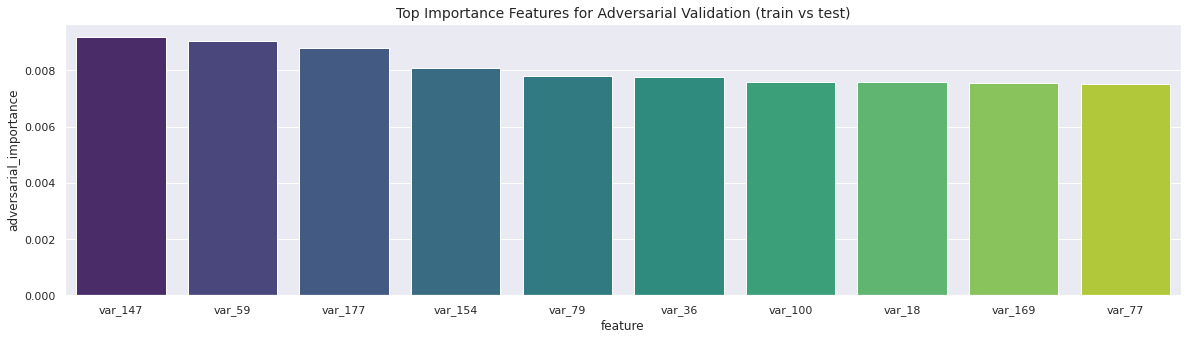

In [43]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)